## *Elements of Machine Learning* 2023
### <font size=3 color='gray'>Alan Reyes-Figueroa</font>

### *Manifold Learning*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE
from sklearn.manifold import locally_linear_embedding
from sklearn import datasets

from sklearn.decomposition import PCA, KernelPCA

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from umap import UMAP

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

## Digits Dataset

In [3]:
digits = datasets.load_digits()

In [4]:
X = digits['data']
y = digits['target']

In [5]:
print(X.shape, y.shape)

(1797, 64) (1797,)


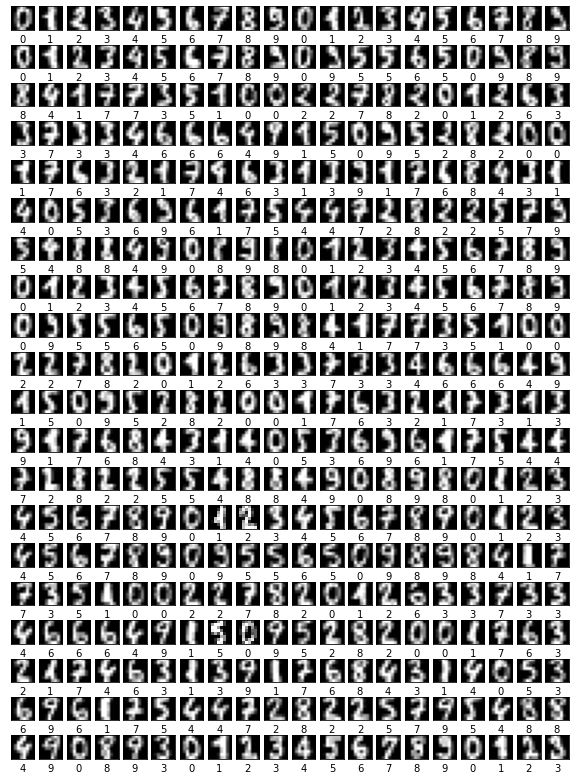

In [6]:
plt.figure(figsize=(10,14))
for i in range(0, 20):
    for j in range(0, 20):
        plt.subplot(20,20,20*i+j+1)
        plt.imshow(X[20*i+j].reshape(8,8), cmap='gray')
        plt.xlabel(y[20*i+j])
        plt.xticks([]), plt.yticks([])
plt.show()

### PCA

In [7]:
pcamodel = PCA(n_components=3)
pca = pcamodel.fit_transform(X)

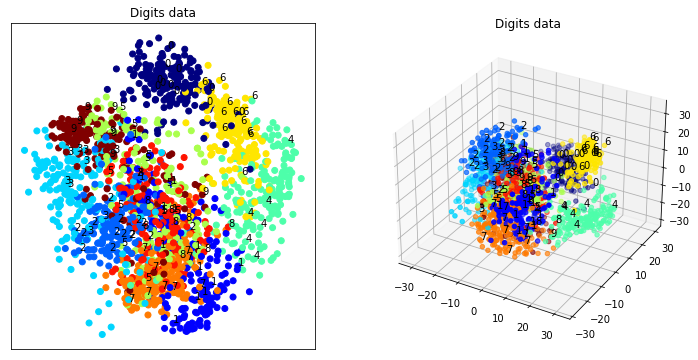

In [8]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.scatter(pca[:, 0], pca[:, 1], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.annotate(y[i], xy=pca[i,:2], xytext=pca[i,:2])
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Digits data')
ax = fig.add_subplot(122, projection='3d')
ax.scatter(pca[:, 0], pca[:, 1], pca[:, 2], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.text(pca[i,0], pca[i,1], pca[i,2], y[i])
ax.set_title("Digits data")
plt.show()

### Kernel PCA

In [9]:
kpcamodel = KernelPCA(n_components=3, kernel='rbf', gamma=100, 
                      max_iter=500, random_state=19)
kpca = kpcamodel.fit_transform(X)

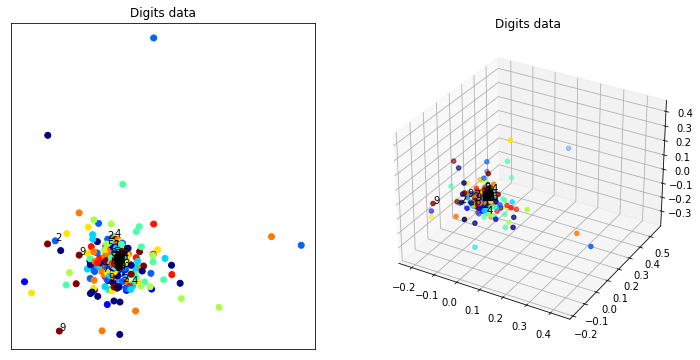

In [10]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.scatter(kpca[:, 0], kpca[:, 1], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.annotate(y[i], xy=kpca[i,:2], xytext=kpca[i,:2])
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Digits data')
ax = fig.add_subplot(122, projection='3d')
ax.scatter(kpca[:, 0], kpca[:, 1], kpca[:, 2], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.text(kpca[i,0], kpca[i,1], kpca[i,2], y[i])
ax.set_title("Digits data")
plt.show()

In [11]:
#fig.savefig('kpca.pdf', bbox_inches='tight')

## Manifold Learning

In [12]:
print("Computing LLE embedding")
X_r, err = locally_linear_embedding(X, n_neighbors=300, n_components=3)
print("Done. Reconstruction error: %g" % err)

Computing LLE embedding
Done. Reconstruction error: 0.000201746


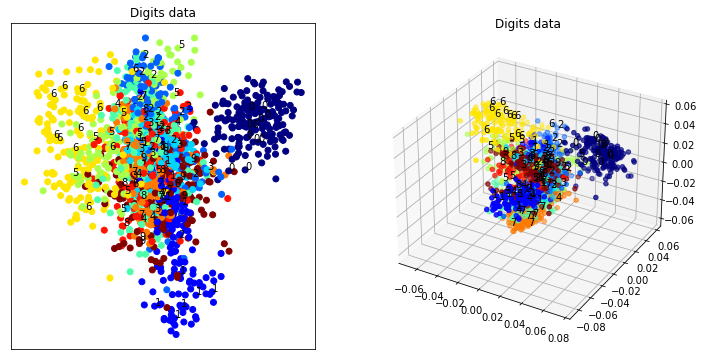

In [13]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.scatter(X_r[:, 0], X_r[:, 1], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.annotate(y[i], xy=X_r[i,:2], xytext=X_r[i,:2])
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Digits data')
ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_r[:, 0], X_r[:, 1], X_r[:, 2], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.text(X_r[i,0], X_r[i,1], X_r[i,2], y[i])
ax.set_title("Digits data")
plt.show()

### LLE

In [14]:
LLE = LocallyLinearEmbedding(n_neighbors=250, n_components=3, eigen_solver='auto')
lle = LLE.fit_transform(X)

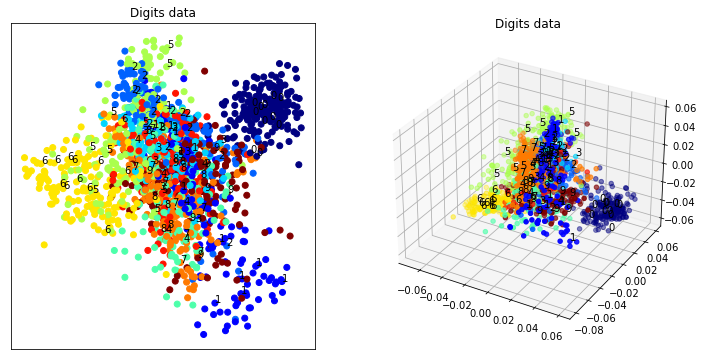

In [15]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.scatter(lle[:, 0], lle[:, 1], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.annotate(y[i], xy=lle[i,:2], xytext=lle[i,:2])
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Digits data')
ax = fig.add_subplot(122, projection='3d')
ax.scatter(lle[:, 0], lle[:, 1], lle[:, 2], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.text(lle[i,0], lle[i,1], lle[i,2], y[i])
ax.set_title("Digits data")
plt.show()

### ISOMap

In [16]:
ISO = Isomap(n_neighbors=250, n_components=3, eigen_solver='auto')
iso = ISO.fit_transform(X)

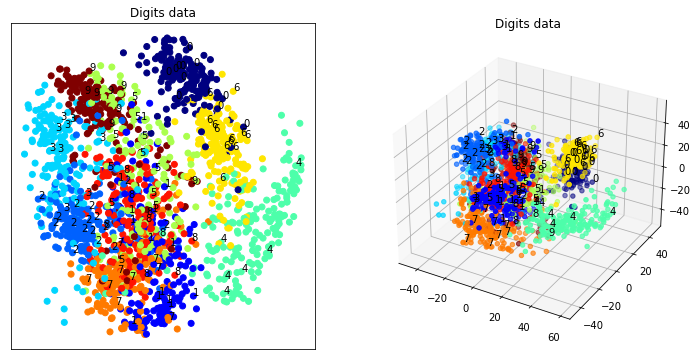

In [17]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.scatter(iso[:, 0], iso[:, 1], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.annotate(y[i], xy=iso[i,:2], xytext=iso[i,:2])
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Digits data')
ax = fig.add_subplot(122, projection='3d')
ax.scatter(iso[:, 0], iso[:, 1], iso[:, 2], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.text(iso[i,0], iso[i,1], iso[i,2], y[i])
ax.set_title("Digits data")
plt.show()

### UMap

In [18]:
Uni = UMAP(dens_lambda=0.1, random_state=2023)
uma = Uni.fit_transform(X)

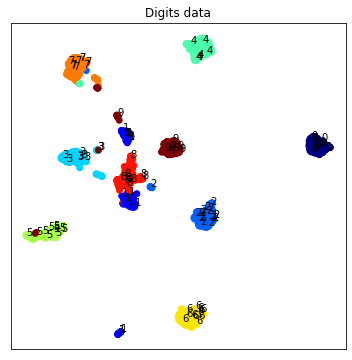

In [19]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(uma[:, 0], uma[:, 1], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.annotate(y[i], xy=uma[i,:2], xytext=uma[i,:2])
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Digits data')
plt.show()

### t-SNE

In [ ]:
# Probar con preplexity = 0.1, 10, 100, 1000
tSNE = TSNE(n_components=3, perplexity=1, init='pca', random_state=0)
tsne = tSNE.fit_transform(X)

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.scatter(tsne[:, 0], tsne[:, 1], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.annotate(y[i], xy=tsne[i,:2], xytext=tsne[i,:2])
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Digits data')
ax = fig.add_subplot(122, projection='3d')
ax.scatter(tsne[:, 0], tsne[:, 1], tsne[:, 2], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.text(tsne[i,0], tsne[i,1], tsne[i,2], y[i])
ax.set_title("Digits data")
plt.show()

### Spectral Embedding

In [ ]:
SE = SpectralEmbedding(n_neighbors=500, n_components=3, eigen_solver='arpack')
spe = SE.fit_transform(X)

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.scatter(spe[:, 0], spe[:, 1], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.annotate(y[i], xy=spe[i,:2], xytext=spe[i,:2])
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Digits data')
ax = fig.add_subplot(122, projection='3d')
ax.scatter(spe[:, 0], spe[:, 1], spe[:, 2], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.text(spe[i,0], spe[i,1], spe[i,2], y[i])
ax.set_title("Digits data")
plt.show()

### MDS

In [ ]:
Mult = MDS(n_components=3, max_iter=100, n_init=1)
mds = Mult.fit_transform(X)

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.scatter(mds[:, 0], mds[:, 1], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.annotate(y[i], xy=mds[i,:2], xytext=mds[i,:2])
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Digits data')
ax = fig.add_subplot(122, projection='3d')
ax.scatter(mds[:, 0], mds[:, 1], mds[:, 2], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.text(mds[i,0], mds[i,1], mds[i,2], y[i])
ax.set_title("Digits data")
plt.show()

### Modified LLE

In [ ]:
LLE = LocallyLinearEmbedding(n_neighbors=60, n_components=3, method='modified', eigen_solver='auto')
lle = LLE.fit_transform(X)

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.scatter(lle[:, 0], lle[:, 1], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.annotate(y[i], xy=lle[i,:2], xytext=lle[i,:2])
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Digits data')
ax = fig.add_subplot(122, projection='3d')
ax.scatter(lle[:, 0], lle[:, 1], lle[:, 2], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.text(lle[i,0], lle[i,1], lle[i,2], y[i])
ax.set_title("Digits data")
plt.show()

### Hessian LLE

In [ ]:
LLE = LocallyLinearEmbedding(n_neighbors=50, n_components=3, method='hessian', eigen_solver='auto')
lle = LLE.fit_transform(X)

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.scatter(lle[:, 0], lle[:, 1], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.annotate(y[i], xy=lle[i,:2], xytext=lle[i,:2])
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Digits data')
ax = fig.add_subplot(122, projection='3d')
ax.scatter(lle[:, 0], lle[:, 1], lle[:, 2], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.text(lle[i,0], lle[i,1], lle[i,2], y[i])
ax.set_title("Digits data")
plt.show()

### LTSA LLE

In [ ]:
LLE = LocallyLinearEmbedding(n_neighbors=50, n_components=3, method='ltsa', eigen_solver='auto')
lle = LLE.fit_transform(X)

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.scatter(lle[:, 0], lle[:, 1], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.annotate(y[i], xy=lle[i,:2], xytext=lle[i,:2])
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Digits data')
ax = fig.add_subplot(122, projection='3d')
ax.scatter(lle[:, 0], lle[:, 1], lle[:, 2], c=y, cmap=plt.cm.jet)
for j in np.arange(0, X.shape[0]//17):
    i = 17*j
    ax.text(lle[i,0], lle[i,1], lle[i,2], y[i])
ax.set_title("Digits data")
plt.show()